<a href="https://colab.research.google.com/github/immimimi/Statistics-Projects/blob/main/My_own_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

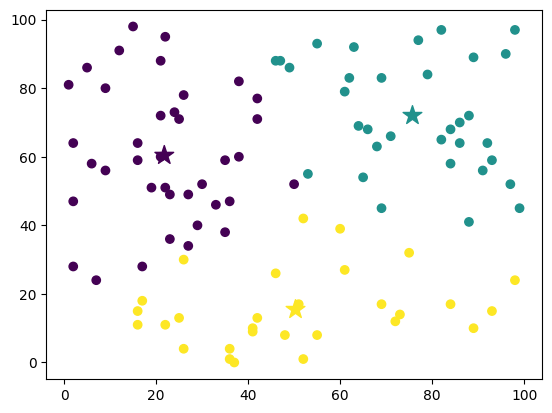

In [1]:
#KMeans from scratch
import numpy as np
import matplotlib.pyplot as plt

class KMeansClustering:
    def __init__(self,k=3):
        self.k = 3
        self.centroids = None

    @staticmethod
    def euclideam_distance(data_point, centroids):
        return np.sqrt(np.sum((centroids - data_point)**2, axis=1))

    def fit(self,X,max_iterations = 200):
        self.centroids = np.random.uniform(np.amin(X,axis=0), np.amax(X,axis=0), size = (self.k,X.shape[1]) )  #randomly initialise centroids within min and max of data (will get wrid if theyre not within boundries), np.amin(X,axis=0) this is the min val for x in each dimension. X.shape[1] def of centroid it has a diffrent shape to data points

        for _ in range(max_iterations):
            y = []

            for data_point in X: # compute distances bettween data points and centroids

                #use Pythagorous (Eucliden Distance)
                #we also want to compute for multiple dimentions
                #so we sum over dimentions also we need to make sure that we dont just
                #get vals for the data point and one centroid but out data point and all centroids (see euclidean_distance func )
                distances = KMeansClustering.euclideam_distance(data_point, self.centroids)#our distances
                cluster_num = np.argmin(distances)#assign the cluster number, returns index of smalles val (i.e the closest centroid) :))
                y.append(cluster_num)

            y = np.array(y)

            #random centoids in place, now lets reposition

            cluster_indices = []#list of list,  its a list of what data points belong to what cluster using cluster index

            for i in range(self.k):
                cluster_indices.append(np.argwhere(y == i))
            cluster_centers = []

            for i, indices in enumerate(cluster_indices):
                if len(indices) == 0 :
                    cluster_centers.append(self.centroids[i])# if there are no data points that belong to centroid then its position does not change

                else:
                    cluster_centers.append(np.mean(X[indices], axis=0)[0]) # new cluster position based on the mean position of the data points belonging to each centroid
            #we cant keep repositioning, we need to break when the centroid position is good enough
            if np.max(self.centroids - np.array(cluster_centers)) < 0.0001:
                break
            else: #otherwise reposition
                self.centroids = np.array(cluster_centers)
        return y


random_points = np.random.randint(0,100, (100,2))

kmeans = KMeansClustering(k=3)

labels = kmeans.fit(random_points)

plt.scatter(random_points[:,0], random_points[:,1], c = labels )

plt.scatter(kmeans.centroids[:,0], kmeans.centroids[:,1], c= range(len(kmeans.centroids)), marker= "*", s=200)


plt.show()










